In [1]:

import matplotlib.pyplot as plt

import torch
import torchvision
import numpy as np
from skimage import io, color, feature, measure
import pandas as pd
import pickle
import os

import cv2

from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
import numpy as np
from tqdm import tqdm
import skimage

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print(matplotlib.get_backend())


module://matplotlib_inline.backend_inline


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from OBJ_detection_YOLO_utiles import *
classes = get_classes()


In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
# model = YOLO("./runs/detect/train13/weights/best.pt")
# Train the model
model.train(data="coco128.yaml", epochs=200, imgsz=640) ### fine tune the YOLO model
# success = model.export()  # export the model to ONNX format

New https://pypi.org/project/ultralytics/8.0.50 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.49 🚀 Python-3.9.7 torch-1.13.0 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

In [6]:
listings = pd.read_csv('LA_Airbnb/listings_detailed.csv')
room_codes = [i.split('/')[-1] for i in listings['listing_url'].values]



In [26]:
room_image_features = {}
for room_count,room_code in tqdm(enumerate(room_codes)):
    try:
        photos = os.listdir(f'LA_photos/{room_code}')
        photo_paths = [f'LA_photos/{room_code}/{photo}' for photo in photos]
        # good_path = []
        # for path in photo_paths:
        #     try:
        #         img = cv2.imread(path)
        #         good_path.append(path)
        #     except:
        #         continue
        # photo_paths = good_path.copy()

    except:
        continue

    if len(photos)==0:
        continue

    photo_paths = [f'LA_photos/{room_code}/{photo}' for photo in photos]
    attrs_all = {}
    for index,path in enumerate(photo_paths):
        try:
            res = model(photo_paths, verbose=False)
            attrs = parse_YOLO_result(res)
            attrs_all[index] = attrs[0]
        except Exception as e:
            continue
    
    if len(attrs_all)==0:
        continue
    listing_level_attrs = get_listing_level_attr(attrs_all,classes)
    room_image_features[room_code] = listing_level_attrs

    if room_count>10:
        break
    




11it [00:41,  3.75s/it]


In [29]:
pd.DataFrame(room_image_features).T


,person,bicycle,car,motorcycle,airplane,...,teddy bear,hair drier,toothbrush,mean_mean_min_dist_r3,mean_mean_weighted_min_dist_r3
65467,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000277,8.666098e-06
206662,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000062,7.111249e-07
210489,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000900,8.795833e-05
109,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000074,3.569979e-06
67792,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000334,2.173117e-05
69015,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN
2732,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000057,4.320511e-06
210855,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN
69838,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000174,1.196261e-05
2864,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.000047,3.324072e-07


In [11]:
good_path = []
for path in photo_paths:
    try:
        img = cv2.imread(path)
        good_path.append(path)
    except:
        continue

In [12]:
good_path

['LA_photos/67089/67089_4.jpg',
 'LA_photos/67089/67089_0.jpg',
 'LA_photos/67089/67089_1.jpg',
 'LA_photos/67089/67089_3.jpg',
 'LA_photos/67089/67089_2.jpg']

In [195]:
pd.DataFrame(listing_level_attr)

ValueError: If using all scalar values, you must pass an index

In [188]:
obj_df

,person,bicycle,car,motorcycle,airplane,...,vase,scissors,teddy bear,hair drier,toothbrush


In [186]:
obj_df.iloc[0,:]=0

IndexError: iloc cannot enlarge its target object

In [180]:
attrs[k]['labels']

NameError: name 'k' is not defined

In [78]:
 a_res.

array([[        124,          47,         611,         493],
       [       3839,        1579,        4338,        1894],
       [        577,        2458,        1359,        2938],
       [       2462,        1690,        4617,        3204],
       [       1496,         243,        1837,         602],
       [        585,        2600,        2761,        3306],
       [       2441,        1613,        3659,        2238],
       [        878,         182,        1278,         571]], dtype=float32)

In [79]:
a_res.orig_shape

(3333, 5000)

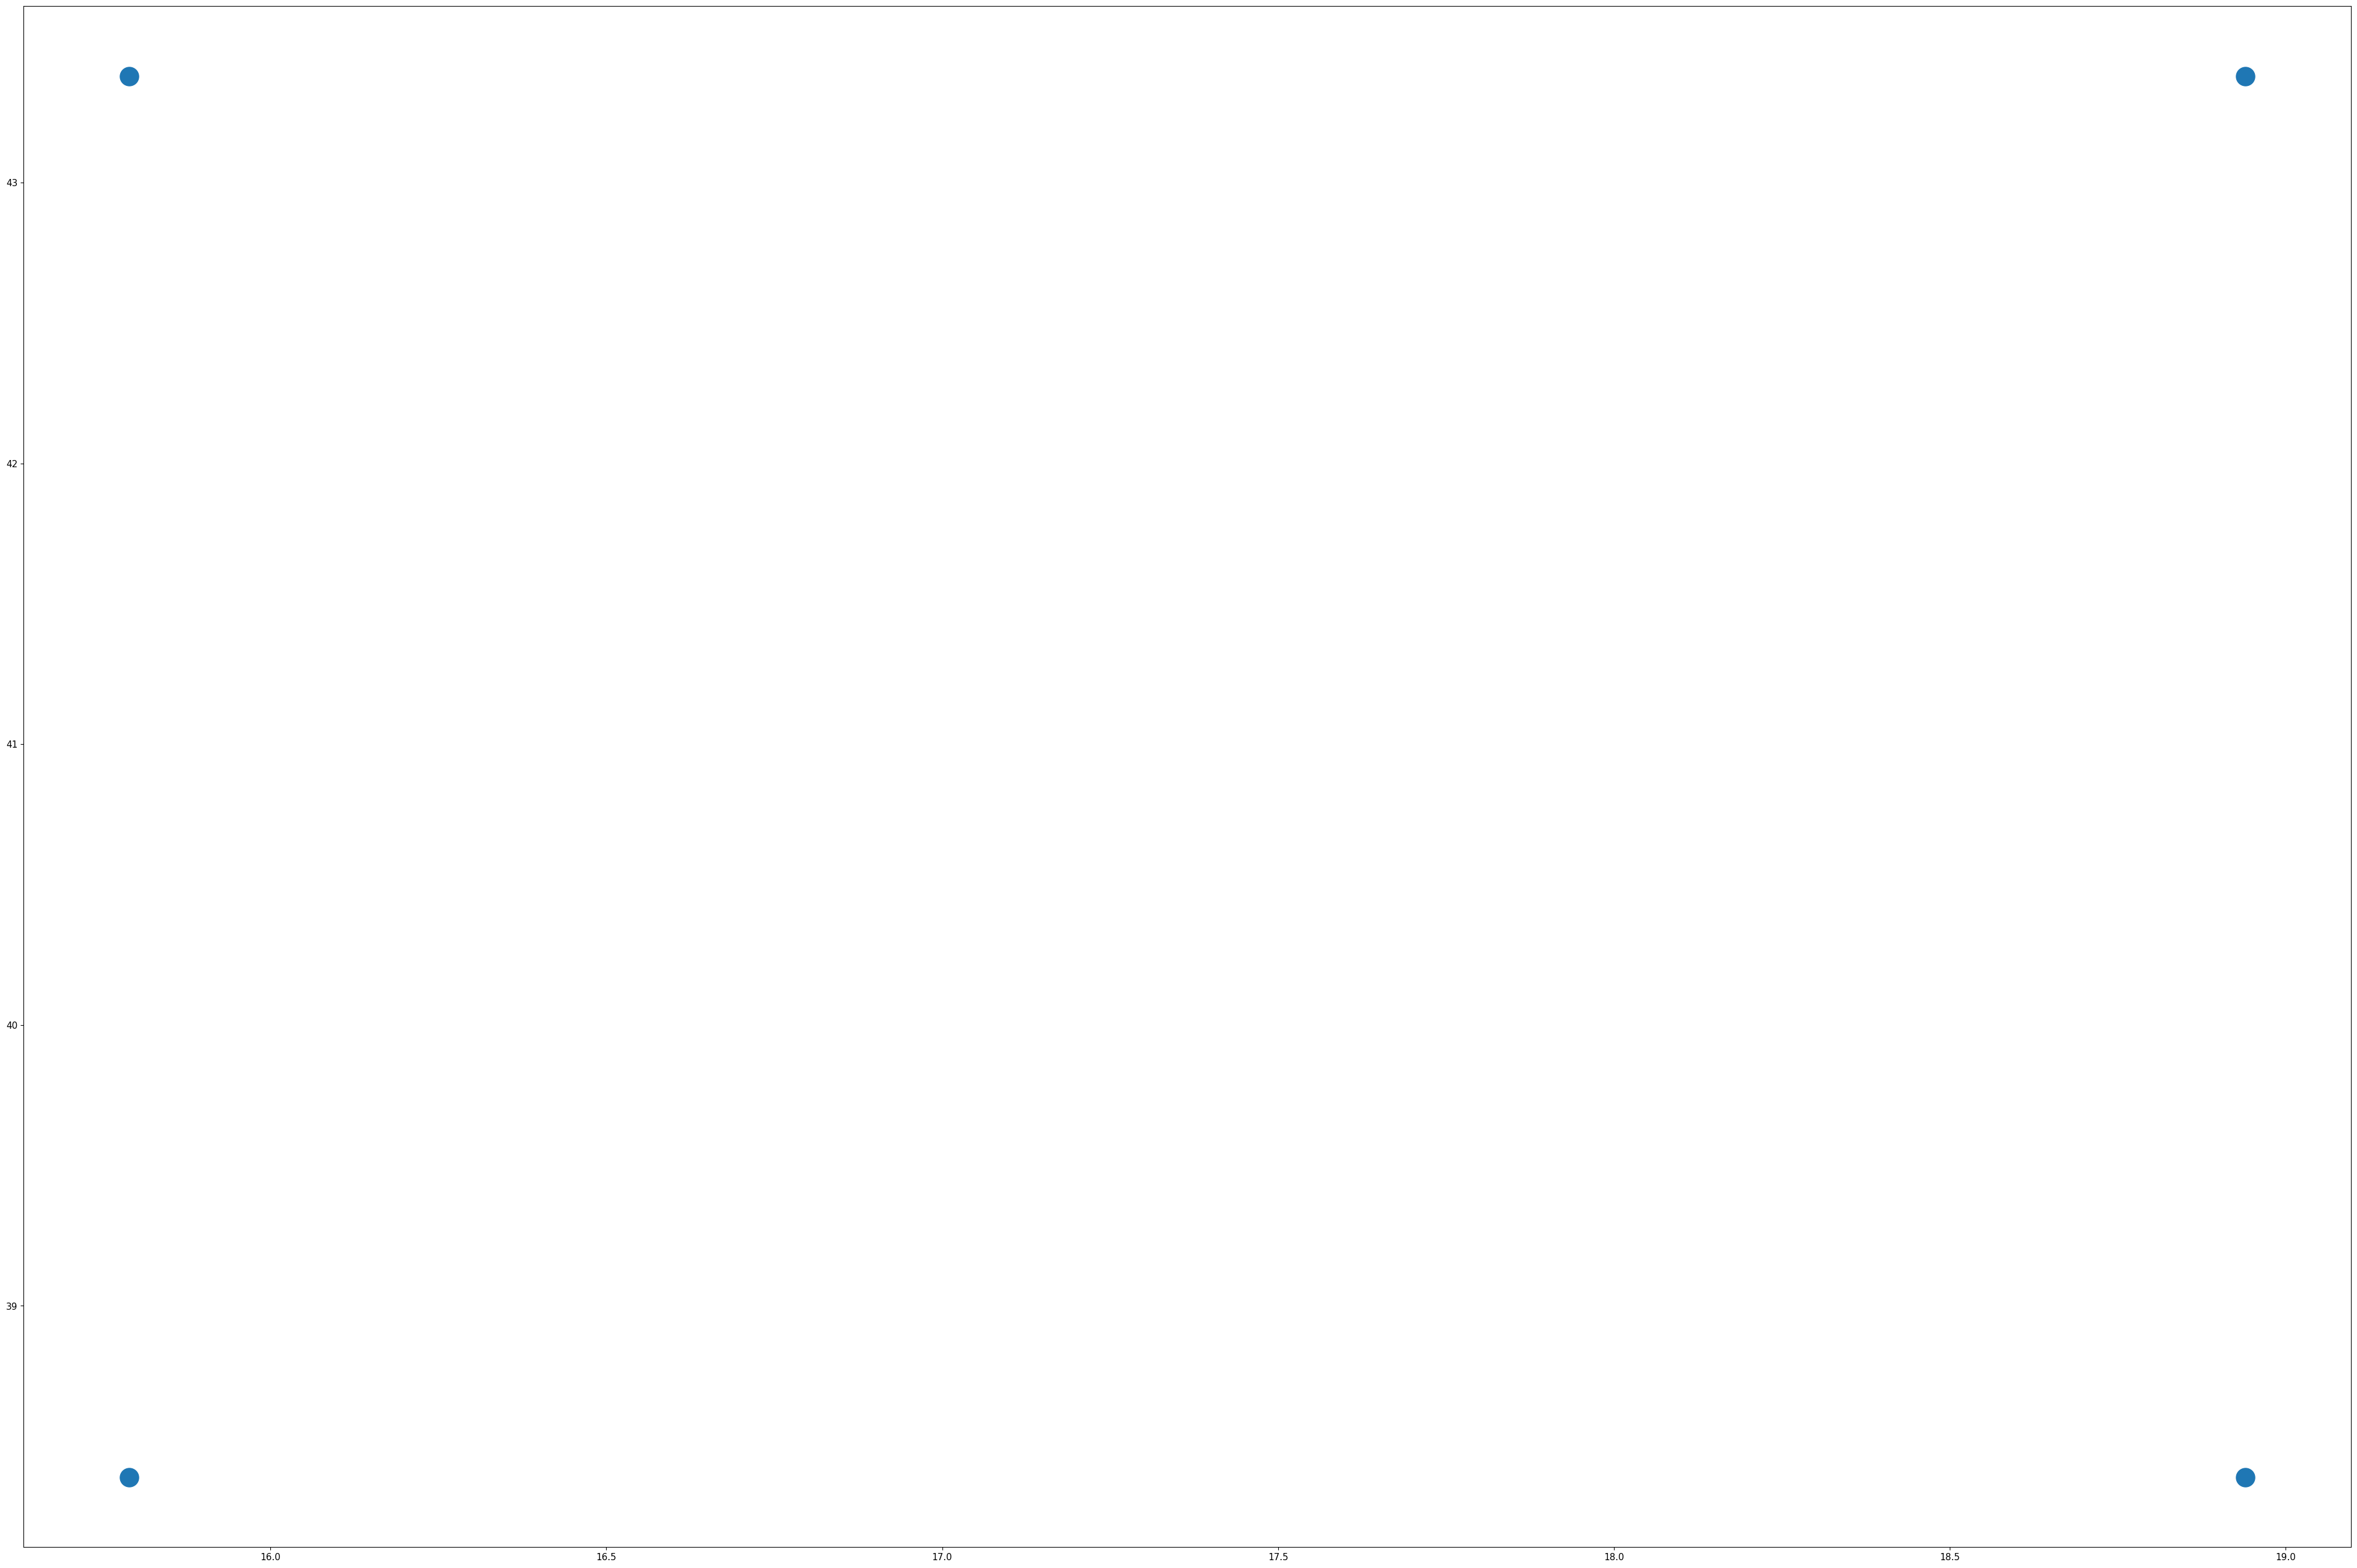

In [76]:
a_res_boxes_loc[:,2]

array([        611,        4338,        1359,        4617,        1837,        2761,        3659,        1278], dtype=float32)

In [66]:
a_res_boxes_loc

array([[        124,          47,         611,         493],
       [       3839,        1579,        4338,        1894],
       [        577,        2458,        1359,        2938],
       [       2462,        1690,        4617,        3204],
       [       1496,         243,        1837,         602],
       [        585,        2600,        2761,        3306],
       [       2441,        1613,        3659,        2238],
       [        878,         182,        1278,         571]], dtype=float32)

In [65]:
a_res.q

AttributeError: 'Results' object has no attribute 'q'. See valid attributes below.

    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (List[str]): A list of class names.
        boxes (List[List[float]], optional): A list of bounding box coordinates for each detection.
        masks (numpy.ndarray, optional): A 3D numpy array of detection masks, where each mask is a binary image.
        probs (numpy.ndarray, optional): A 2D numpy array of detection probabilities for each class.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (numpy.ndarray, optional): A 2D numpy array of detection probabilities for each class.
        names (List[str]): A list of class names.
        path (str): The path to the image file.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    

In [63]:
a_res_boxes_loc

array([[        124,          47,         611,         493],
       [       3839,        1579,        4338,        1894],
       [        577,        2458,        1359,        2938],
       [       2462,        1690,        4617,        3204],
       [       1496,         243,        1837,         602],
       [        585,        2600,        2761,        3306],
       [       2441,        1613,        3659,        2238],
       [        878,         182,        1278,         571]], dtype=float32)

In [62]:
a_res_boxes_loc


array([[        124,          47,         611,         493],
       [       3839,        1579,        4338,        1894],
       [        577,        2458,        1359,        2938],
       [       2462,        1690,        4617,        3204],
       [       1496,         243,        1837,         602],
       [        585,        2600,        2761,        3306],
       [       2441,        1613,        3659,        2238],
       [        878,         182,        1278,         571]], dtype=float32)

In [57]:
a_res_conf

array([    0.89366,     0.86425,     0.74867,     0.72291,     0.61099,     0.38358,     0.29613,     0.25345], dtype=float32)

In [37]:
list(res[1]._keys)

['boxes']

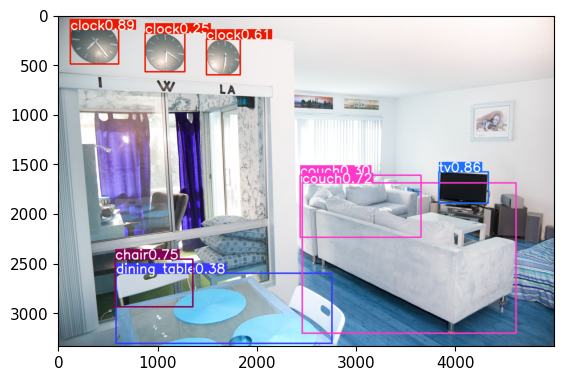

In [30]:
plt.imshow(res[0].plot())
